In [ ]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy as np
from torch.utils.data import Dataset

 MNIST 데이터 불러오기


In [ ]:

# dataset class

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # return label, image data tensor and target tensor
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass

    pass

In [ ]:
mnist_dataset=MnistDataset("/content/drive/MyDrive/GAN/mnist_train.csv")

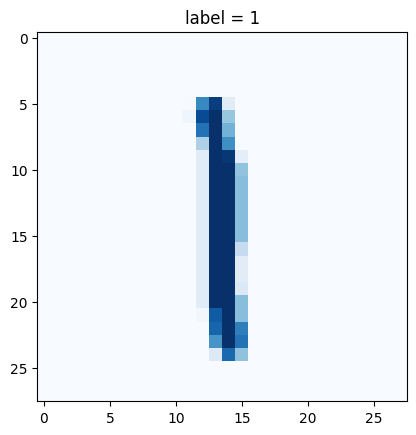

In [ ]:
mnist_dataset.plot_image(14)

판별기 만들기

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.Linear(200,1),
        nn.Sigmoid()
    )

    # 손실함수 설정
    self.loss_function=nn.MSELoss()

    # SGD 옵티마이저 설정
    self.optimizer=torch.optim.SGD(self.parameters(),lr=0.01)

    # 진행 측정을 위한 변수 초기화
    self.counter=0
    self.progress=[]

    pass

  def forward(self,inputs):
    return self.model(inputs)

  def train(self,inputs,targets):
    outputs=self.forward(inputs)

    loss=self.loss_function(outputs,targets)


    self.counter+=1
    if (self.counter%10 ==0):
      self.progress.append(loss.item())
      pass

    if(self.counter % 10000==0):
      print('counter =',self.counter)
      pass

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    pass


  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
    pass

판별기 테스트하기

In [ ]:
def generate_random(size):
  random_data=torch.rand(size)
  return random_data

In [ ]:
D=Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
  D.train(image_data_tensor, torch.FloatTensor([1.0]))
  D.train(generate_random(784), torch.FloatTensor([0.0]))

counter = 10000
counter = 20000
counter = 30000
counter = 40000
counter = 50000
counter = 60000
counter = 70000
counter = 80000
counter = 90000
counter = 100000
counter = 110000
counter = 120000


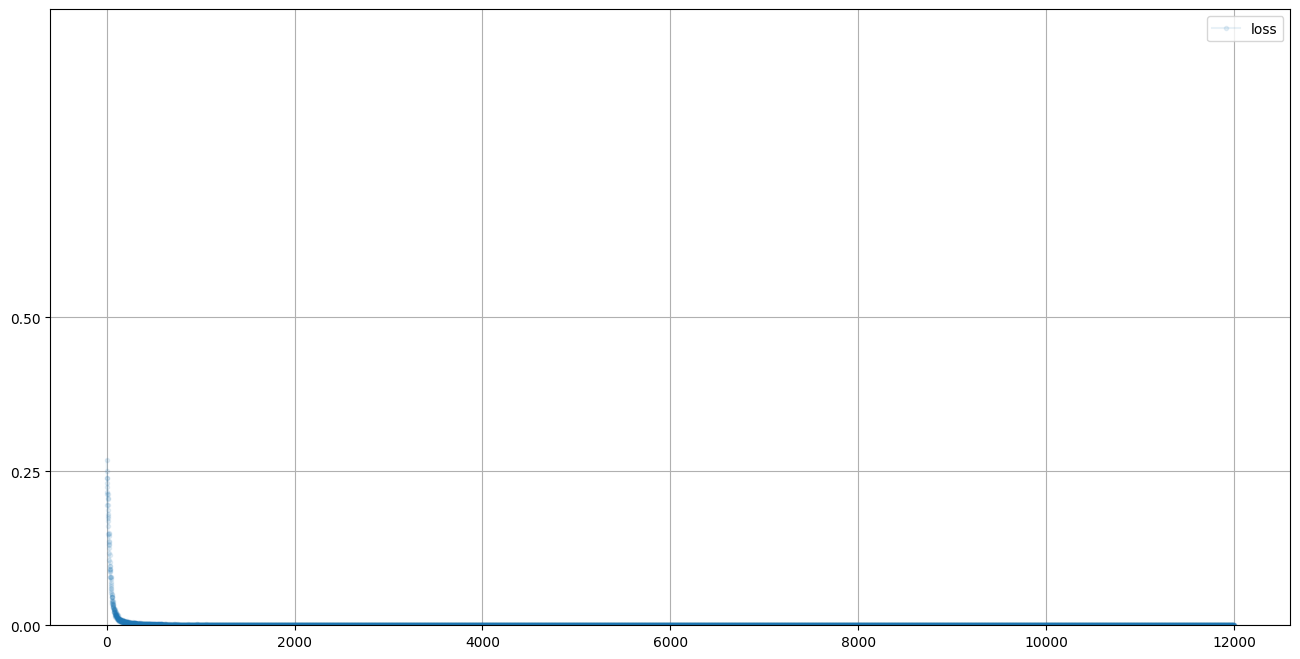

In [ ]:
D.plot_progress()

In [ ]:
for i in range(4):
  image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
  print( D.forward( image_data_tensor ).item() )
  pass

for i in range(4):
  print( D.forward( generate_random(784) ).item() )
  pass


0.9963622689247131
0.9973300695419312
0.9966467022895813
0.9959241151809692
0.006131147034466267
0.006568943150341511
0.005678231827914715
0.004145166836678982


MNIST 생성기

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(1,200),
        nn.Sigmoid(),
        nn.Linear(200,784),
        nn.Sigmoid()
    )

    # 손실함수 x

    # SGD 옵티마이저 설정
    self.optimizer=torch.optim.SGD(self.parameters(),lr=0.01)

    # 진행 측정을 위한 변수 초기화
    self.counter=0
    self.progress=[]

    pass

  def forward(self,inputs):
    return self.model(inputs)

  def train(self,D,inputs,targets):
    g_output=self.forward(inputs)

    d_output=D.forward(g_output)

    loss=D.loss_function(d_output, targets)

    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter+=1
    if (self.counter%10 ==0):
      self.progress.append(loss.item())
      pass

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    pass


  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
    pass

생성기 결과 확인하기

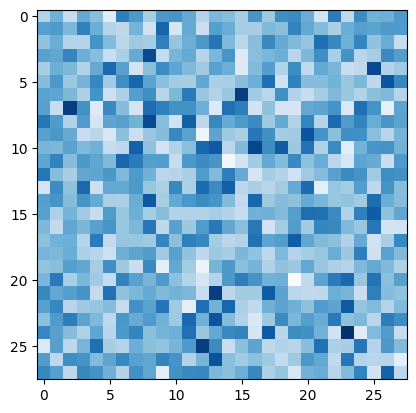

In [ ]:
G=Generator()
ouput=G.forward(generate_random(1))
img=ouput.detach().numpy().reshape(28,28)
plt.imshow(img, interpolation='none', cmap='Blues')

GAN 훈련하기

In [ ]:
D=Discriminator()

G=Generator()

image_list=[]

for label, image_data_tensor, target_tensor in mnist_dataset:

  #참에 대한 판별기 훈련
  D.train(image_data_tensor, torch.FloatTensor([1.0]))
  # 거짓에 대한 판별기 훈련
  D.train(G.forward(generate_random(1)).detach(),torch.FloatTensor([0.0]))
  G.train(D, generate_random(1),torch.FloatTensor([1.0]))

  pass

counter = 10000
counter = 20000
counter = 30000
counter = 40000
counter = 50000
counter = 60000
counter = 70000
counter = 80000
counter = 90000
counter = 100000
counter = 110000
counter = 120000


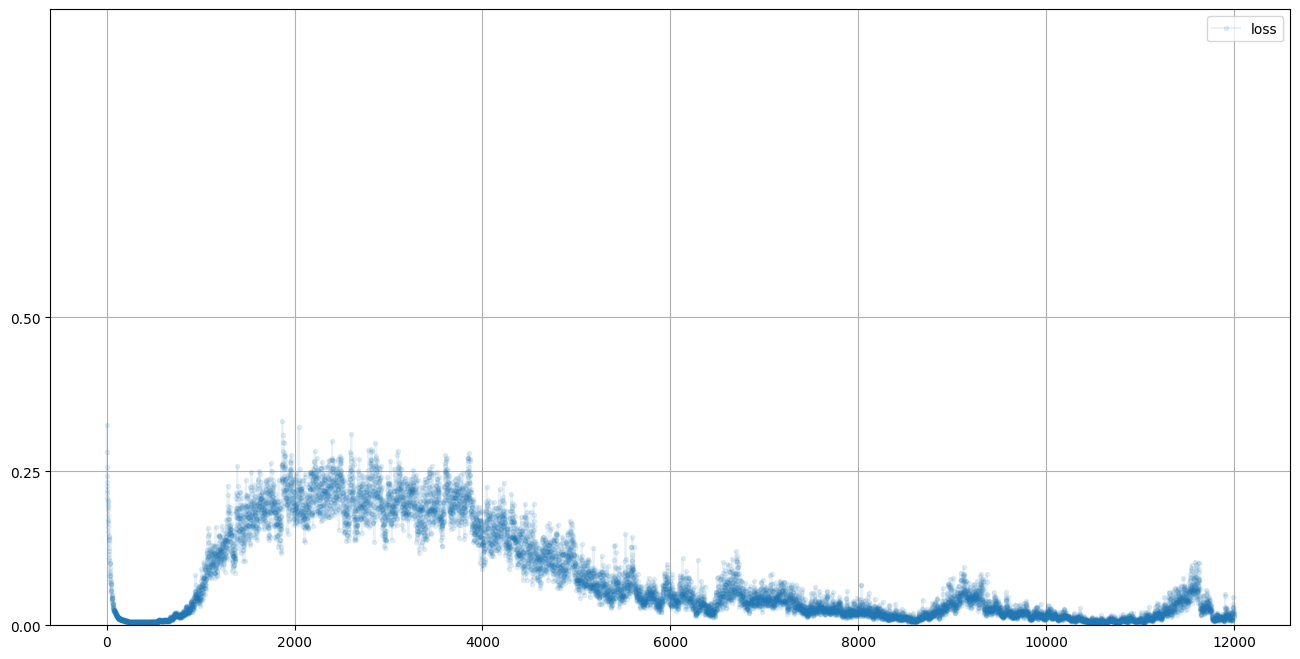

In [ ]:
D.plot_progress()

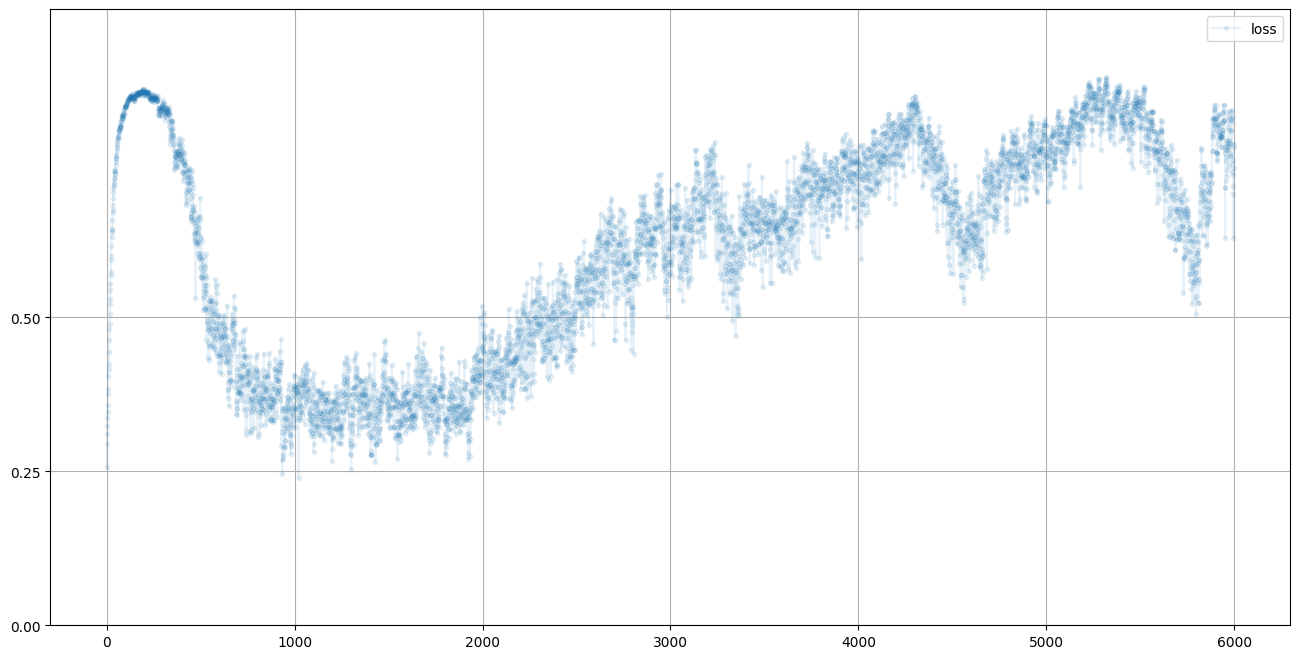

In [ ]:
G.plot_progress()

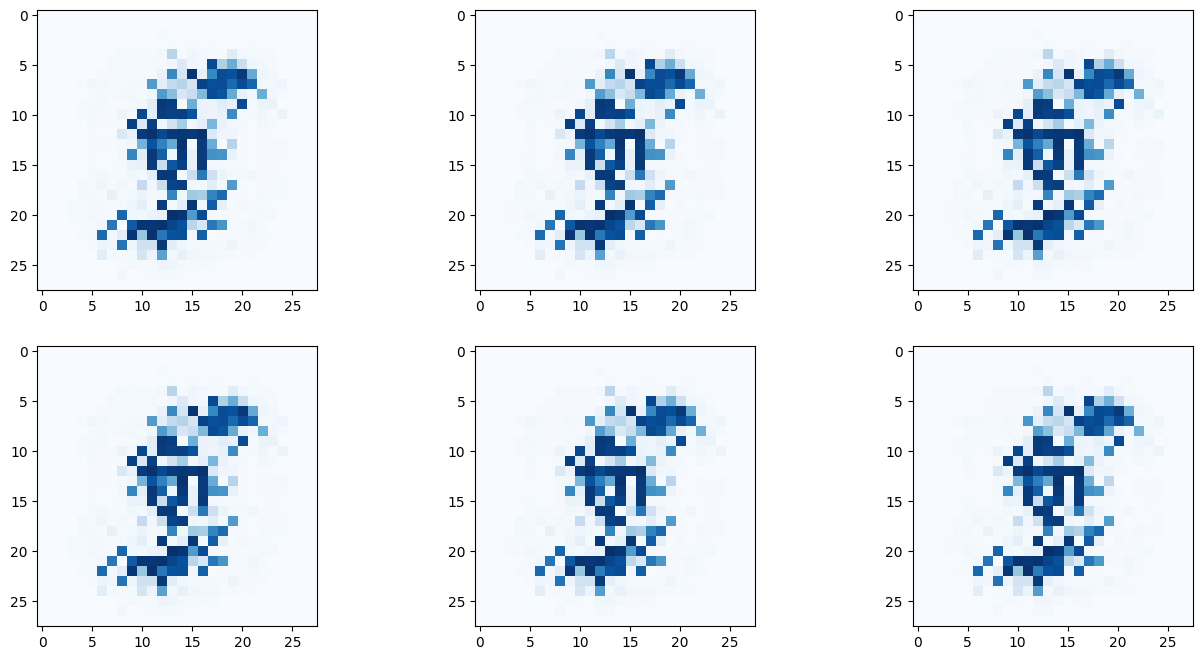

In [ ]:
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass
